In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Data Collection/3. Data Competition Sites
htrain = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
# Fall Problem Sessions/Fall Problem Session 2 
htrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
htrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have missing values for `LotFrontage`, `Alley`, `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, and `MiscFeature`.

In [5]:
# version of the data set with missing values removed
htrain.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Bad idea.

We need to look at variable type and classify them as 'numerical' or 'categorical.'
I will follow Kaggle tutorial for the rest of the notebook.

In [6]:
# analysing SalePrice
htrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

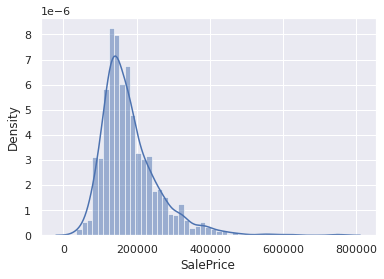

In [7]:
# visualizing the above distribution
sns.histplot(
    htrain['SalePrice'], kde=True,
    stat="density", kde_kws=dict(cut=3)
)

In [8]:
# We can look at its deviation from standard normal distribution.
# skewness (lack of symmetry) and excess kurtosis (heavy/light tailed)
print("Skewness: %f" % htrain['SalePrice'].skew())
print("Kurtosis: %f" % htrain['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Positive values for the skewness indicate data that are skewed right. That is, the right tail is longer than the left tail. 

Positive values of excess kurtosis indicate that its tails are longer and fatter, and often its central peak is higher and sharper, as compared with standard normal.

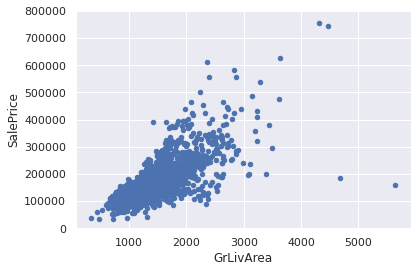

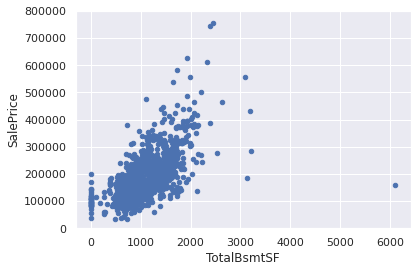

In [9]:
# Next we look at numerical variables GrLivArea and TotalBsmtSF
for var in ['GrLivArea', 'TotalBsmtSF']:
    data = pd.concat([htrain['SalePrice'], htrain[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

`SalePrice` and `GrLivArea` seem to have linear relation.

`SalePrice` and `TotalBsmtSF` seem to have high solpe, if linear relation.

However, both relationships are positive, which means that as one variable increases, the other also increases. 

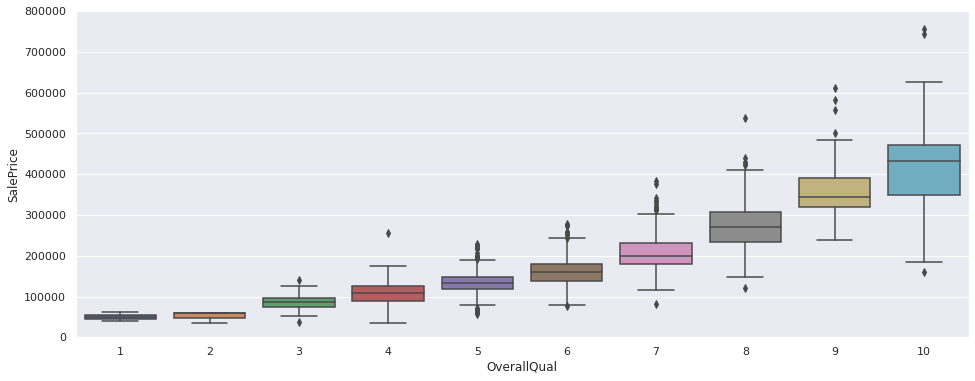

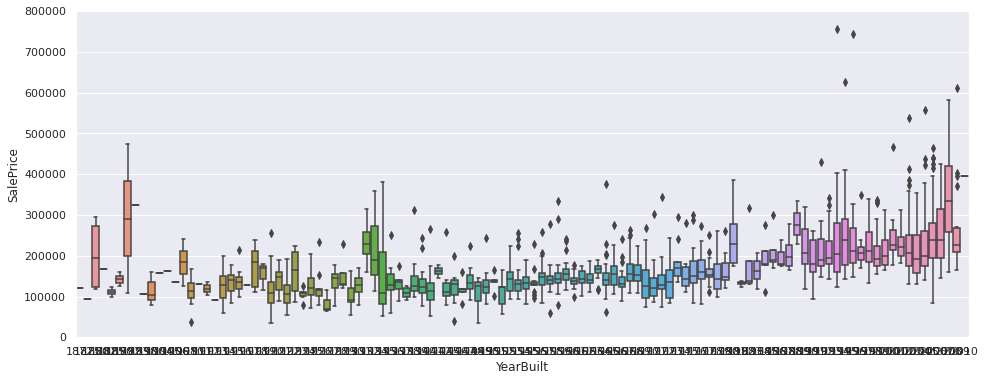

In [10]:
# Next we look at categorical variables OverallQual and YearBuilt
for var in ['OverallQual', 'YearBuilt']:
    data = pd.concat([htrain['SalePrice'], htrain[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000);

It appears that `SalePrice` is in constant prices. That is, the effect of inflation is removed so than prices are comparable over the years.

The relationship seems to be stronger in the case of `OverallQual`, where the box plot shows how sales prices increase with the overall quality.